# Speed difference between reading numerical data from plain CSV vs. using _.npy_ file format
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

In [1]:
import numpy as np
import time

### Number of samples

In [2]:
n_samples=1000000

### Reading from a CSV

In [3]:
with open('fdata.txt', 'w') as fdata:
    for _ in range(n_samples):
        fdata.write(str(10*np.random.random())+',')

In [4]:
t1=time.time()
array_direct = np.fromfile('fdata.txt',dtype=float, count=-1,sep=',').reshape(1000,1000)
t2=time.time()
print(array_direct)
print('\nShape: ',array_direct.shape)
print(f"Time took to read: {t2-t1} seconds.")

[[0.19518972 6.39889099 8.86179077 ... 1.78274828 4.14988379 7.45517339]
 [0.28846542 6.64861961 0.24638384 ... 1.30792505 1.0367481  4.74891783]
 [8.40814537 5.05111512 8.63130373 ... 6.54190772 6.38385259 2.75347884]
 ...
 [5.05132432 5.93558368 9.07536994 ... 3.65136772 6.29371461 3.87511569]
 [7.44320641 3.3288574  0.27708193 ... 2.10070278 6.34682483 9.01881409]
 [1.52621504 9.35146825 1.50775586 ... 2.60806502 5.0169436  4.3254457 ]]

Shape:  (1000, 1000)
Time took to read: 1.695016860961914 seconds.


In [5]:
t1=time.time()
with open('fdata.txt','r') as fdata:
    datastr=fdata.read()
lst = datastr.split(',')
lst.pop()
array_lst=np.array(lst,dtype=float).reshape(1000,1000)
t2=time.time()
print(array_lst)
print('\nShape: ',array_lst.shape)
print(f"Time took to read: {t2-t1} seconds.")

[[0.19518972 6.39889099 8.86179077 ... 1.78274828 4.14988379 7.45517339]
 [0.28846542 6.64861961 0.24638384 ... 1.30792505 1.0367481  4.74891783]
 [8.40814537 5.05111512 8.63130373 ... 6.54190772 6.38385259 2.75347884]
 ...
 [5.05132432 5.93558368 9.07536994 ... 3.65136772 6.29371461 3.87511569]
 [7.44320641 3.3288574  0.27708193 ... 2.10070278 6.34682483 9.01881409]
 [1.52621504 9.35146825 1.50775586 ... 2.60806502 5.0169436  4.3254457 ]]

Shape:  (1000, 1000)
Time took to read: 0.5665757656097412 seconds.


### Save as a .npy file and read

In [6]:
np.save('fnumpy.npy',array_lst)

In [7]:
t1=time.time()
array_reloaded = np.load('fnumpy.npy')
t2=time.time()
print(array_reloaded)
print('\nShape: ',array_reloaded.shape)
print(f"Time took to load: {t2-t1} seconds.")

[[0.19518972 6.39889099 8.86179077 ... 1.78274828 4.14988379 7.45517339]
 [0.28846542 6.64861961 0.24638384 ... 1.30792505 1.0367481  4.74891783]
 [8.40814537 5.05111512 8.63130373 ... 6.54190772 6.38385259 2.75347884]
 ...
 [5.05132432 5.93558368 9.07536994 ... 3.65136772 6.29371461 3.87511569]
 [7.44320641 3.3288574  0.27708193 ... 2.10070278 6.34682483 9.01881409]
 [1.52621504 9.35146825 1.50775586 ... 2.60806502 5.0169436  4.3254457 ]]

Shape:  (1000, 1000)
Time took to load: 0.00496673583984375 seconds.


In [8]:
t1=time.time()
array_reloaded = np.load('fnumpy.npy').reshape(10000,100)
t2=time.time()
print(array_reloaded)
print('\nShape: ',array_reloaded.shape)
print(f"Time took to load: {t2-t1} seconds.")

[[0.19518972 6.39889099 8.86179077 ... 9.63106665 1.85069765 4.25534529]
 [8.14357747 6.56347765 8.02998847 ... 0.93040803 6.67272555 6.91109852]
 [1.51447298 4.95842653 5.70978086 ... 7.32853786 4.5788133  3.44281139]
 ...
 [2.35366938 9.77452941 6.17511558 ... 9.61026204 2.85523678 1.55581879]
 [2.97670426 8.5953027  8.24646196 ... 0.62146363 5.68336225 8.85861478]
 [1.29283608 0.21021618 4.93077805 ... 2.60806502 5.0169436  4.3254457 ]]

Shape:  (10000, 100)
Time took to load: 0.006982326507568359 seconds.


### Speed enhancement as the sample size grows...

In [9]:
n_samples=[100000*i for i in range(1,11)] 
time_lst_read=[]
time_npy_read=[]

for sample_size in n_samples:
    with open('fdata.txt', 'w') as fdata:
        for _ in range(sample_size):
            fdata.write(str(10*np.random.random())+',')

    t1=time.time()
    with open('fdata.txt','r') as fdata:
        datastr=fdata.read()
    lst = datastr.split(',')
    lst.pop()
    array_lst=np.array(lst,dtype=float)
    t2=time.time()
    time_lst_read.append(1000*(t2-t1))
    print("Array shape:",array_lst.shape)

    np.save('fnumpy.npy',array_lst)

    t1=time.time()
    array_reloaded = np.load('fnumpy.npy')
    t2=time.time()
    time_npy_read.append(1000*(t2-t1))
    print("Array shape:",array_reloaded.shape)
    
    print(f"Processing done for {sample_size} samples\n")

Array shape: (100000,)
Array shape: (100000,)
Processing done for 100000 samples

Array shape: (200000,)
Array shape: (200000,)
Processing done for 200000 samples

Array shape: (300000,)
Array shape: (300000,)
Processing done for 300000 samples

Array shape: (400000,)
Array shape: (400000,)
Processing done for 400000 samples

Array shape: (500000,)
Array shape: (500000,)
Processing done for 500000 samples

Array shape: (600000,)
Array shape: (600000,)
Processing done for 600000 samples

Array shape: (700000,)
Array shape: (700000,)
Processing done for 700000 samples

Array shape: (800000,)
Array shape: (800000,)
Processing done for 800000 samples

Array shape: (900000,)
Array shape: (900000,)
Processing done for 900000 samples

Array shape: (1000000,)
Array shape: (1000000,)
Processing done for 1000000 samples



In [10]:
import matplotlib.pyplot as plt

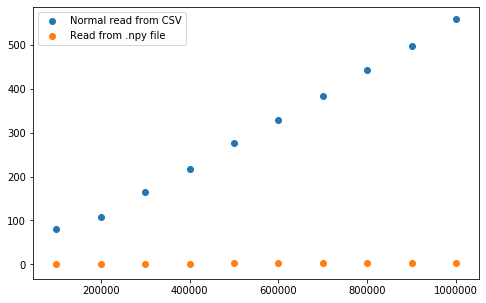

In [11]:
plt.figure(figsize=(8,5))
#plt.xscale('log')
#plt.yscale('log')
plt.scatter(n_samples,time_lst_read)
plt.scatter(n_samples,time_npy_read)
plt.legend(['Normal read from CSV','Read from .npy file'])
plt.show()